# Image Procesing

In [58]:
import tensorflow_datasets as tfds

In [59]:
(train, validation, test), info = tfds.load ('fashion_mnist',split = ['train[:80%]','train[80%:]','test'],
as_supervised=True, with_info=True)

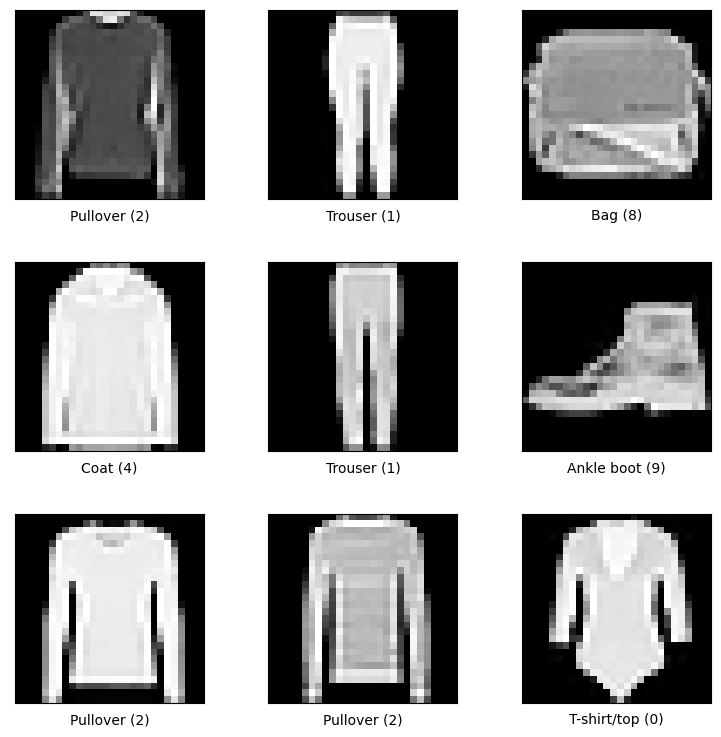

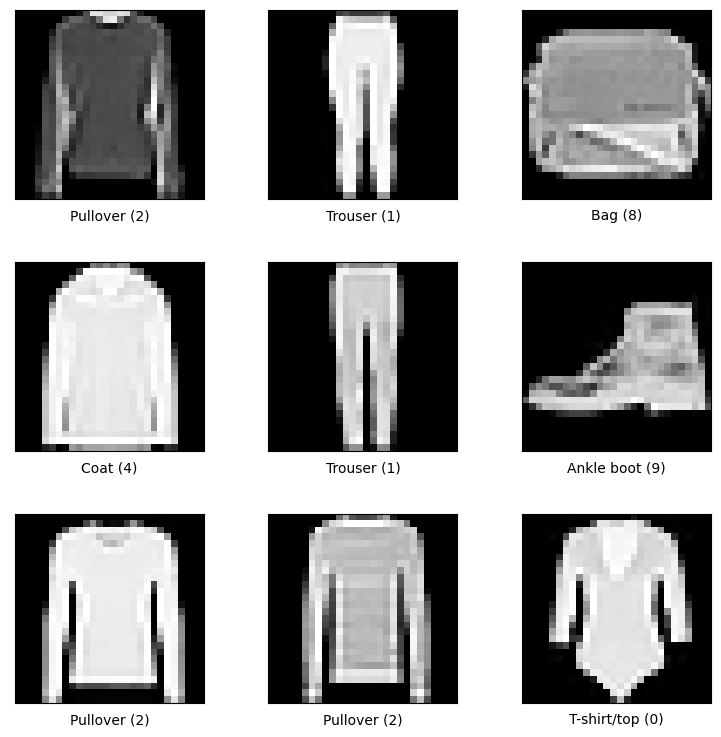

In [60]:
tfds.show_examples(train, info)

## Transform

In [61]:
import tensorflow as tf

In [62]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255, label

train = train.map(normalize_img)
train = train.cache()
train = train.batch(128)

In [63]:
validation = validation.map(normalize_img)
validation = validation.cache()
validation = validation.batch(128)

In [64]:
test = test.map(normalize_img)
test = test.cache()
test = test.batch(128)

## Modeling 

In [65]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [66]:
model = Sequential([
    # Input
    Conv2D(128, (3,3), activation='relu', input_shape=[28,28,1]),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),

    Dense(256, activation='relu',),
    Dense(10, activation='softmax')

])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
hasil = model.fit(train, epochs=3, batch_size=128, validation_data=test, verbose=1)

Epoch 1/3
375/375 [==============================] - 55s 145ms/step - loss: 0.5209 - accuracy: 0.8136 - val_loss: 0.4051 - val_accuracy: 0.8549
Epoch 2/3
375/375 [==============================] - 41s 110ms/step - loss: 0.3424 - accuracy: 0.8766 - val_loss: 0.3415 - val_accuracy: 0.8760
Epoch 3/3
375/375 [==============================] - 41s 111ms/step - loss: 0.2934 - accuracy: 0.8933 - val_loss: 0.3164 - val_accuracy: 0.8844


In [70]:
model.evaluate(validation, verbose=1)

94/94 [==============================] - 3s 29ms/step - loss: 0.2819 - accuracy: 0.8955


[0.2818688750267029, 0.8955000042915344]

## Prediksi Test Set

In [71]:
class_names = info.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [72]:
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 14ms/step


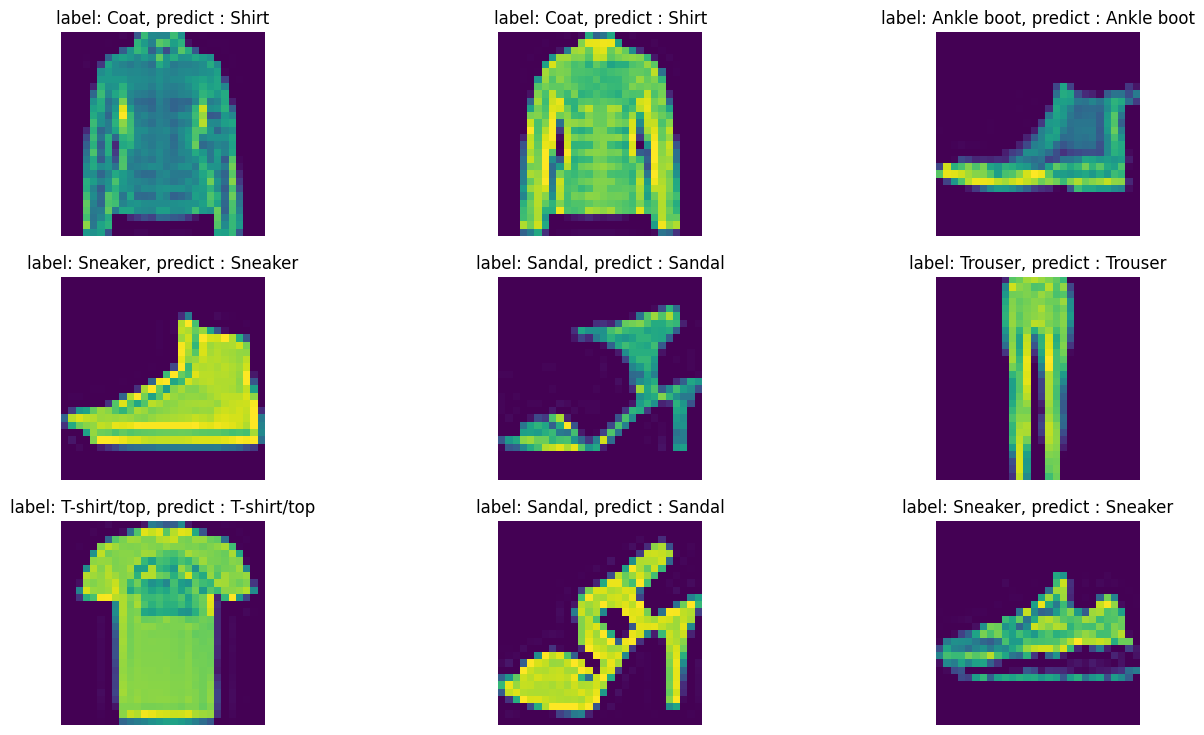

In [73]:
image, label = next(iter(test))
plt.figure(figsize=(16,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None, ...]))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {class_names[label[i]]}, predict : {class_names[y_pred]}')

In [74]:
hasil.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

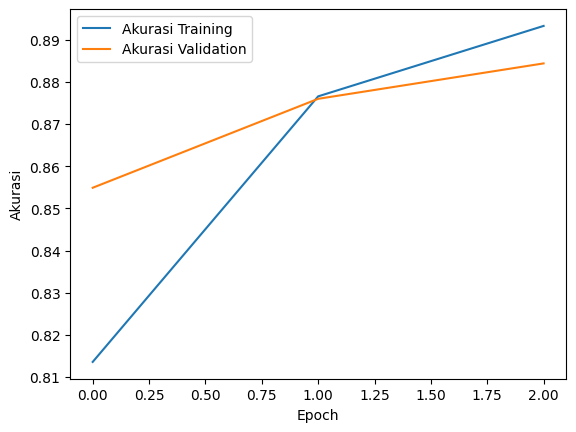

In [75]:
plt.plot(hasil.history['accuracy'], label='Akurasi Training')
plt.plot(hasil.history['val_accuracy'], label='Akurasi Validation')

plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()